<a href="https://colab.research.google.com/github/Atzingen/IA-FIC2021/blob/main/01_notebook_e_mnist_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 01 

Curso de Inteligência Artificial para tomada de decisões

Este notebook tem como objetivo mostrar um pouco da visualização dos dados e treinamento de modelos para classificação utilizando o dataset mnist e uma rede neural com o framewrok tensorflow. 

# Bibliotecas

In [ ]:
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import cv2
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import datasets

# Como notebooks Funcionam

Mais informações nas referências abaixo:

* [Introdução Ao Jupyter Notebook](https://https://www.letscode.com.br/blog/introducao-ao-jupyter-notebook)

* [Site do Jupyter Notebook](https://jupyter.org/)

* [Anaconda](https://www.anaconda.com/products/individual-d)

* [Google Colab](https://colab.research.google.com/)

In [10]:
nome = 'Gustavo'
idade = 30
print(f"Meu nome é {nome} e eu tenho {idade} anos.")

Meu nome é Gustavo e eu tenho 30 anos.


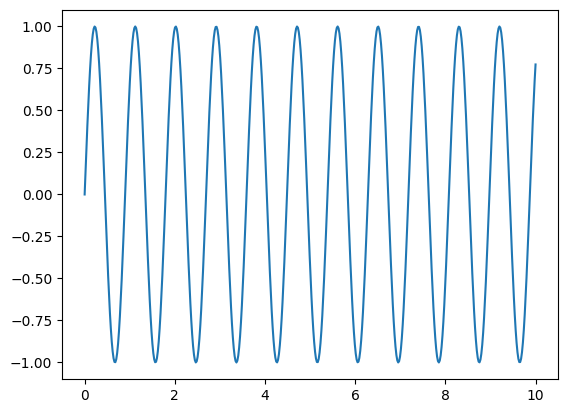

In [22]:
t = np.linspace(0, 10, 500)
y = np.sin(7*t)
plt.plot(t, y)

In [25]:
px.line(t, x=t, y=y, labels={'x': 'Tempo', 'y': 'Seno'}, title='Gráfico de Seno')

In [26]:
(x_train, y_train_raw), (x_test, y_test_raw) = datasets.mnist.load_data()

In [27]:
x_train.shape

(60000, 28, 28)

In [28]:
y_train_raw.shape

(60000,)

In [38]:
print(y_train_raw[:5])

[5 0 4 1 9]


In [36]:
x_train[0].shape

(28, 28)

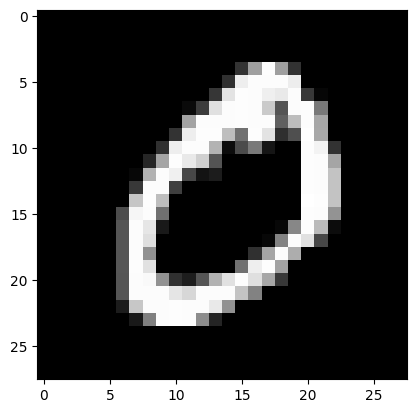

In [39]:
plt.imshow(x_train[1], cmap='gray')

In [46]:
@interact(index=0)
def plot_image(index):
    plt.imshow(x_train[index], cmap='gray')
    plt.title(f"Label: {y_train_raw[index]}")
    plt.show()

interactive(children=(IntSlider(value=0, description='index', max=1), Output()), _dom_classes=('widget-interac…

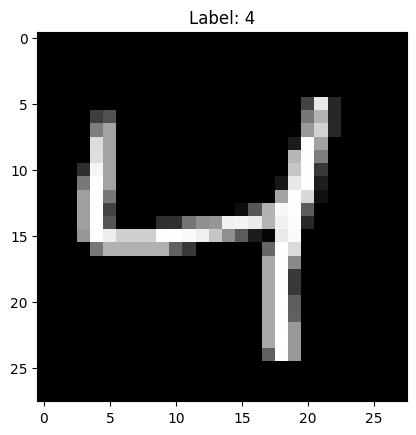

In [43]:
plot_image(2)

# Mnist Dataset

* Vizualização do formato dataset
* Formato e conversão dos labels (one hot array)
* Plot das imagens dos dígitos - plotly express e interact
* Normalização e reshape dos dados

In [49]:
input_shape = (28, 28, 1)

x_train = x_train/255.0
x_test = x_test/255.0

y_train = tf.keras.utils.to_categorical(y_train_raw, 10)
y_test = tf.keras.utils.to_categorical(y_test_raw, 10)

In [50]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Modelo de Rede Neural com tensorflow e keras

In [64]:
model = tf.keras.Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [65]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [66]:
model.compile(loss="categorical_crossentropy", 
              optimizer="adam", 
              metrics=["accuracy"])

In [67]:
model.fit(x_train, 
         y_train, 
         epochs=10, 
         batch_size=32, 
         validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.3849 - accuracy: 0.8903 - val_loss: 0.3126 - val_accuracy: 0.9146
Epoch 2/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3139 - accuracy: 0.9113 - val_loss: 0.3169 - val_accuracy: 0.9161
Epoch 3/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.3224 - accuracy: 0.9104 - val_loss: 0.3070 - val_accuracy: 0.9161
Epoch 4/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.3250 - accuracy: 0.9109 - val_loss: 0.2958 - val_accuracy: 0.9209
Epoch 5/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.3338 - accuracy: 0.9103 - val_loss: 0.3290 - val_accuracy: 0.9087
Epoch 6/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.3450 - accuracy: 0.9081 - val_loss: 0.3554 - val_accuracy: 0.9089
Epoch 7/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.3514 - accuracy: 0.9074 - val_loss: 0.3858 - val_ac

In [68]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.4560 - accuracy: 0.8976


[0.45601752400398254, 0.897599995136261]

# Validação do modelo treinado

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
img = cv2.imread('1.png')
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img = cv2.resize(img, (28, 28))
img = img/255.0
img = np.expand_dims(img, axis=0)
img=img.reshape(img.shape[0], img.shape[1], img.shape[2], 1)

In [ ]:
resultado_one_hot = model.predict(img)
print(resultado_one_hot, np.argmax(resultado_one_hot))

In [51]:
28*28

784